# Jeffrey's priors

$$P_J(\theta)\propto\sqrt{\det J(\theta)}$$
up to the normalization, where $J(\theta)$ is the Fisher's information:
$$J_{\alpha\beta}(\theta)=\int dx f(x,\theta)\partial_{\theta_\alpha}\log f(x,\theta)\partial_{\theta_\beta}\log f(x,\theta)=
\int dx \frac{\partial_{\theta_\alpha} f(x,\theta)\partial_{\theta_\beta} f(x,\theta)}{f(x,\theta)}=$$
$$=-\int dx f(x,\theta) \partial_{\theta_\alpha}\partial_{\theta_\beta} \log f(x,\theta)$$

In [1]:
from sympy import *
init_printing(use_unicode=False, wrap_line=False, no_global=True)

### Binomial

I get by hand
$$P_J(p) \propto 1/\sqrt{p(1-p)}$$

In [2]:
x = Symbol('x',positive=True)
integrate(1/sqrt(x)/sqrt(1-x), (x,0,1))

So 
$$P_J(p) =\frac{1}{\pi} \frac{1}{\sqrt{p(1-p)}}=Beta(1/2,1/2)$$


For a multinomial I have $P_J(p_1,...,p_n)\propto\prod_i 1/\sqrt{p_i}$, which is the Dirichlet's distribution with all parameters set to 1/2. 

### Exponential 

In [3]:
mu = Symbol('mu',positive=True)
x = Symbol('x',positive=True)
def g(x,mu):
    return 1/mu*exp(-x/mu)

In [4]:
integrate(g(x,mu),(x,0,oo))

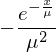

In [5]:
dg_dmu=diff(g(x,mu),x)
dg_dmu

In [6]:
integrate(1/g(x,mu)*(dg_dmu)**2,(x,0,+oo))

So the prior is

$$P_J(\mu)d\mu\propto \frac{d\mu}{\mu}$$

### Gaussian

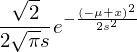

In [7]:
mu = Symbol('mu')
x = Symbol('x')
s = Symbol('s',positive=True)
def f(x,mu,sigma):
    return 1/sqrt(2*pi*sigma**2)*exp(-(x-mu)**2/(2*sigma**2))
f(x,mu,s)

In [8]:
integrate(f(x,mu,s),(x,-oo,oo))

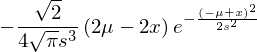

In [9]:
df_dmu=diff(f(x,mu,s),mu)
df_dmu

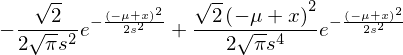

In [10]:
df_ds=diff(f(x,mu,s),s)
df_ds

In [11]:
J_00=simplify(integrate(1/f(x,mu,s)*(df_dmu)**2,(x,-oo,+oo)))
J_11=simplify(integrate(1/f(x,mu,s)*(df_ds)**2,(x,-oo,+oo)))
J_01=simplify(integrate(1/f(x,mu,s)*(df_ds)*(df_dmu),(x,-oo,+oo)))

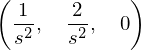

In [12]:
J_00,J_11,J_01

$$P_J(\mu,\sigma)d\mu d\sigma\propto\frac{\sqrt{2}d\mu d\sigma}{\sigma^2}\propto\frac{d\mu}{\sigma}\frac{d\sigma}{\sigma}$$

### Gaussian with known variance

In [13]:
J_00=simplify(integrate(1/f(x,mu,s)*(df_dmu)**2,(x,-oo,+oo)))

In [14]:
J_00

$$P_J(\mu)d\mu\propto \frac{d\mu}{\sigma}\propto const \times  d\mu$$
The prior is flat, and non-normalizable, so it is an improper prior

### Gaussian with known mean

In [15]:
J_11=simplify(integrate(1/f(x,mu,s)*(df_ds)**2,(x,-oo,+oo)))

In [16]:
J_11

$$P_J(\sigma)d\sigma \propto \frac{d\sigma}{\sigma}$$
The prior is still non-normalizable, so it is an improper prior

### Poisson

In [17]:
k = Symbol('k')
def poisson(k,mu):
    return exp(-mu)*mu**k/factorial(k)

In [18]:
Sum(poisson(k,mu), (k, 0, oo)).doit()

In [19]:
Sum(poisson(k,mu)*k, (k, 0, oo)).doit()

In [20]:
Sum(poisson(k,mu)*k**2, (k, 0, oo)).doit()

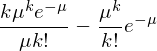

In [21]:
dp_dmu=diff(poisson(k,mu),mu)
dp_dmu

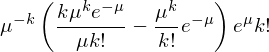

In [22]:
dlp_dmu=diff(log(poisson(k,mu)),mu)
dlp_dmu

In [23]:
#simplify(Sum(dp_dmu**2/poisson(k,mu), (k, 0, oo)).doit())
simplify(Sum(dlp_dmu**2*poisson(k,mu), (k, 0, oo)).doit())

$$P_J(\mu)d\mu \propto\frac{d\mu}{\sqrt\mu}???$$

it should be $1/\mu$

## Application: Prior for Gaussian, and Student's t-distribution

Using the prior just derived, $P_J(\mu,\sigma)d\mu d\sigma\propto\frac{d\mu}{\sigma}\frac{d\sigma}{\sigma}$, I compute the posterior for a Gaussian likelihood:

$$P(x_1,...,x_N|\mu,\sigma)=\prod_i \frac{\exp{(-(x_i-mu)^2/2\sigma^2})}{\sqrt{2\pi\sigma^2}}=
\frac{1}{(2\pi\sigma^2)^{N/2}}\exp{(-N((\bar x-\mu)^2+s^2)/2\sigma^2))},$$
$$\bar x =\frac{1}{N}\sum_i x_i,$$
$$s^2=\frac{1}{N}\sum_i (x_i-\bar x)^2$$

$$P(\mu,\sigma|x_1,...,x_N)d\mu d\sigma\propto \frac{d\mu}{\sigma}\frac{d\sigma}{\sigma}\frac{1}{(2\pi\sigma^2)^{N/2}}\exp{(-N((\bar x-\mu)^2+s^2)/2\sigma^2))}$$

First of all I integrate in $d\sigma$, posing $\alpha\equiv -N((\bar x-\mu)^2+s^2)$

In [28]:
mu = Symbol('mu',real=True)
s = Symbol('s',positive=True)
xbar = Symbol('xbar',real=True)
sigma = Symbol('sigma',positive=True)
N = Symbol('N',positive=True)

In [29]:
alpha = Symbol('alpha',positive=True)
def g2(alpha,s):
    return exp(-alpha/(2*sigma**2))/sigma**(N+2)
g2(alpha,sigma)

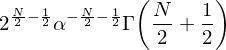

In [30]:
int_res=simplify(integrate(g2(alpha,sigma),(sigma,0,+oo)))
int_res

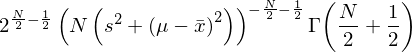

In [31]:
f_mu=int_res.subs(alpha,N*(s**2+(mu-xbar)**2))
f_mu

In [32]:
norm=integrate(f_mu,(mu,-oo,+oo))

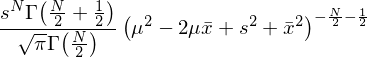

In [33]:
f_mu_norm=simplify(f_mu/norm)
f_mu_norm

This result can be written as:
$$P(\mu|x_1,...,x_N)d\mu=\frac{\Gamma(N/2+1/2)}{\sqrt{\pi}\Gamma(N/2)} 
\frac{d\mu}{s}\left[1+\left(\frac{\mu-\bar x}{s}\right)^2\right]^{-N/2-1/2}$$

Let's now introduce:

$$t\equiv \frac{\mu-\bar x}{s/\sqrt{N}}$$

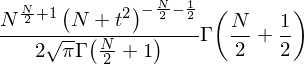

In [34]:
# here t=(mu-xbar)/(s*sqrt(N))
t=Symbol('t')
f_t=int_res.subs(alpha,N*s**2*(1+t**2/N))
norm_t=integrate(f_t,(t,-oo,+oo))
f_t_norm=simplify(f_t/norm_t)
f_t_norm

$$P(t|x_1,...x_N)dt=\frac{\sqrt{N}\Gamma(N/2+1/2)}{2\sqrt\pi \Gamma(N/2+1)}\left(1+\frac{t^2}{N}\right)^{-N/2-1/2}$$

which is exactly Student's t-distribution with N degrees of freedom!

So Student's t-distribution comes as a posterior from a non-informative Gaussian prior and Gaussian likelihood.

In [35]:
simplify(integrate(f_t_norm,(t,-oo,oo)))

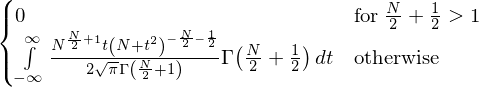

In [36]:
simplify(integrate(f_t_norm*t,(t,-oo,oo)))

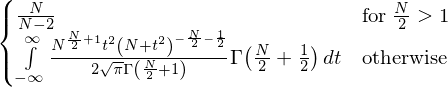

In [37]:
simplify(integrate(f_t_norm*t**2,(t,-oo,oo)))

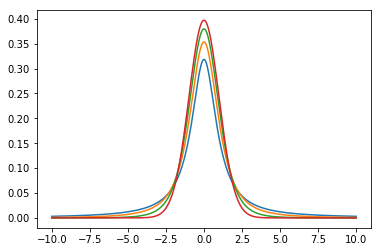

In [38]:
f=lambdify((t,N),f_t_norm,modules=["numpy","sympy"])

import numpy as np
x=np.linspace(-10,10,1000)
import matplotlib.pyplot as plt
%matplotlib inline
#I fix the number of N trials
plt.plot(x,f(x,1))
plt.plot(x,f(x,2))
plt.plot(x,f(x,5))
plt.plot(x,f(x,50))

### Exponential
With the same procedure for the exponential distribution I get:
$$P(\mu|x_1,...,x_N)d\mu\propto\frac{d\mu}{\mu^{N+1}}\exp{(-N\bar x/\mu)}$$

In [39]:
mu = Symbol('mu',positive=True)
xbar = Symbol('xbar',positive=True)
N = Symbol('N',positive=True)
def e(mu,xbar,N):
    return exp(-N*xbar/mu)/mu**(N+1)
e(mu,xbar,N)

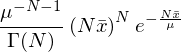

In [40]:
norm=integrate(e(mu,xbar,N),(mu,0,oo))
e_norm=simplify(e(mu,xbar,N)/norm)
e_norm

In [41]:
simplify(integrate(e_norm,(mu,0,oo)))

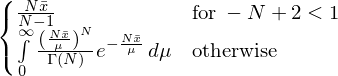

In [43]:
av_x=simplify(integrate(e_norm*mu,(mu,0,oo)))
av_x

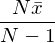

In [44]:
av_x_ok=av_x.args[0][0]
av_x_ok

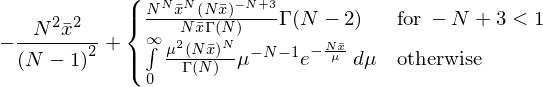

In [45]:
var_x=simplify(integrate(e_norm*mu**2,(mu,0,oo))-av_x_ok**2)
var_x

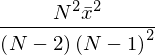

In [46]:
var_x_ok=simplify(var_x.args[0]+var_x.args[1].args[0][0])
var_x_ok

In [47]:
f=lambdify((mu,xbar,N),e_norm,modules=["numpy","sympy"])

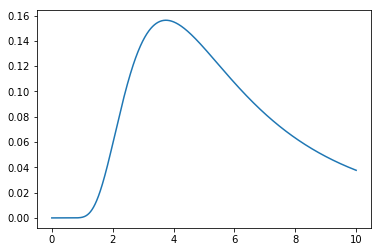

In [48]:
#check why lambdify fails for large N!
import numpy as np
x=np.linspace(0.001,10,1000)
import matplotlib.pyplot as plt
%matplotlib inline
#I fix the average xxbar after Nn trials
xxbar=5
Nn=3
plt.plot(x,f(x,xxbar,Nn));

### Binary
It gives Beta(number of zeros+1/2, number of ones +1/2)

$$P(p|x_1,...,x_N)dp=p^{N\bar x}(1-p)^{N(1-\bar x)}\frac{dp}{\pi\sqrt{p(1-p)}}$$

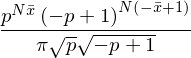

In [49]:
p=Symbol('p',positive=True)
xbar=Symbol('xbar',positive=True)
N=Symbol('N',positive=True)
def b(p,xbar,N):
    return p**(N*xbar)*(1-p)**(N*(1-xbar))/pi/sqrt(p*(1-p))
b(p,xbar,N)

In [59]:
#slow
#integrate(b(p,xbar,N),(p,0,1))

### Poisson

$$P(\mu|x_1,...,x_N)d\mu\propto \exp{(-N\mu)}\mu^{N\bar x}\frac{d\mu}{\mu}$$

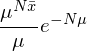

In [52]:
mu = Symbol('mu',positive=True)
xbar = Symbol('xbar',positive=True)
N = Symbol('N',positive=True)
def p(mu,xbar,N):
    return exp(-N*mu)*mu**(N*xbar)/mu
p(mu,xbar,N)

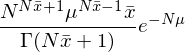

In [53]:
norm=integrate(p(mu,xbar,N),(mu,0,oo))
p_norm=simplify(p(mu,xbar,N)/norm)
p_norm

In [54]:
simplify(integrate(p_norm,(mu,0,oo)))

In [55]:
x_av=simplify(integrate(p_norm*mu,(mu,0,oo)))
x_av

In [56]:
var=simplify(integrate(p_norm*mu**2,(mu,0,oo))-x_av**2)
var

In [57]:
p_np=lambdify((mu,xbar,N),p_norm,modules=["numpy","sympy"])

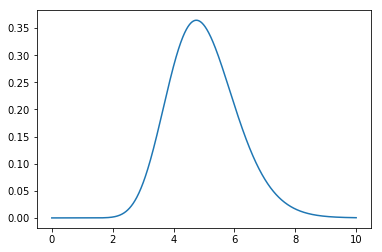

In [58]:
import numpy as np
x=np.linspace(0.001,10,1000)
import matplotlib.pyplot as plt
%matplotlib inline
#I fix the average xxbar after Nn trials
xxbar=5
Nn=4
plt.plot(x,p_np(x,xxbar,Nn));